Listing of All Businesses
https://data.lacity.org/Administration-Finance/Listing-of-All-Businesses/r4uk-afju/about_data


In [16]:
import pandas as pd

In [17]:
file_path = 'dataset\\Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path, 
                 dtype={"NAICS": "Int64"}, 
                 parse_dates=["LOCATION START DATE", "LOCATION END DATE"]
                 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593026 entries, 0 to 1593025
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   LOCATION ACCOUNT #         1593026 non-null  object        
 1   BUSINESS NAME              1593026 non-null  object        
 2   DBA NAME                   245872 non-null   object        
 3   STREET ADDRESS             1592924 non-null  object        
 4   CITY                       1592920 non-null  object        
 5   ZIP CODE                   1593026 non-null  object        
 6   LOCATION DESCRIPTION       1592903 non-null  object        
 7   MAILING ADDRESS            359466 non-null   object        
 8   MAILING CITY               359478 non-null   object        
 9   MAILING ZIP CODE           359344 non-null   object        
 10  NAICS                      624448 non-null   Int64         
 11  PRIMARY NAICS DESCRIPTION  624448 non

In [18]:
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce', infer_datetime_format=True)
df.info()

C:\Users\fredk\AppData\Local\Temp\ipykernel_12256\926956247.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce', infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593026 entries, 0 to 1593025
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   LOCATION ACCOUNT #         1593026 non-null  object        
 1   BUSINESS NAME              1593026 non-null  object        
 2   DBA NAME                   245872 non-null   object        
 3   STREET ADDRESS             1592924 non-null  object        
 4   CITY                       1592920 non-null  object        
 5   ZIP CODE                   1593026 non-null  object        
 6   LOCATION DESCRIPTION       1592903 non-null  object        
 7   MAILING ADDRESS            359466 non-null   object        
 8   MAILING CITY               359478 non-null   object        
 9   MAILING ZIP CODE           359344 non-null   object        
 10  NAICS                      624448 non-null   Int64         
 11  PRIMARY NAICS DESCRIPTION  624448 non

In [19]:
# drop na NAICS and na Start date
df1 = df.dropna(subset=['NAICS', 'LOCATION START DATE'])

C:\Users\fredk\AppData\Local\Temp\ipykernel_12256\849516336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['LOCATION START DATE'].dt.year


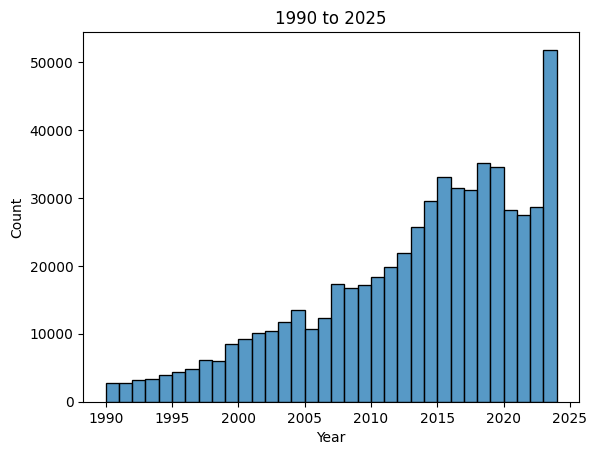

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df1['Year'] = df1['LOCATION START DATE'].dt.year
plot1 = sns.histplot(df1['Year'], bins=range(1990, df1["Year"].max()), kde=False)
plot1 = plt.title('1990 to 2025')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624379 entries, 0 to 1593025
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LOCATION ACCOUNT #         624379 non-null  object        
 1   BUSINESS NAME              624379 non-null  object        
 2   DBA NAME                   209427 non-null  object        
 3   STREET ADDRESS             624375 non-null  object        
 4   CITY                       624332 non-null  object        
 5   ZIP CODE                   624379 non-null  object        
 6   LOCATION DESCRIPTION       624361 non-null  object        
 7   MAILING ADDRESS            297306 non-null  object        
 8   MAILING CITY               297315 non-null  object        
 9   MAILING ZIP CODE           297208 non-null  object        
 10  NAICS                      624379 non-null  Int64         
 11  PRIMARY NAICS DESCRIPTION  624379 non-null  object      

#### NAICS info

In [35]:
file_path = 'dataset\\naics_2_clean.csv'
naics_2 = pd.read_csv(file_path)

In [41]:
naics_dict = naics_2.set_index('Code')['Sector_Title'].to_dict()

In [47]:
df1['NAICS_2'] = df1['NAICS'].astype(str).str[:2].astype(int)
df1['2d_title'] = df1['NAICS_2'].map(naics_dict)

C:\Users\fredk\AppData\Local\Temp\ipykernel_12256\1311135580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NAICS_2'] = df1['NAICS'].astype(str).str[:2].astype(int)
C:\Users\fredk\AppData\Local\Temp\ipykernel_12256\1311135580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['2d_title'] = df1['NAICS_2'].map(naics_dict)


#### Dataset preview

##### Count of Businesses by NAICS Sector (2d_title)

Text(0, 0.5, 'NAICS Sector Title')

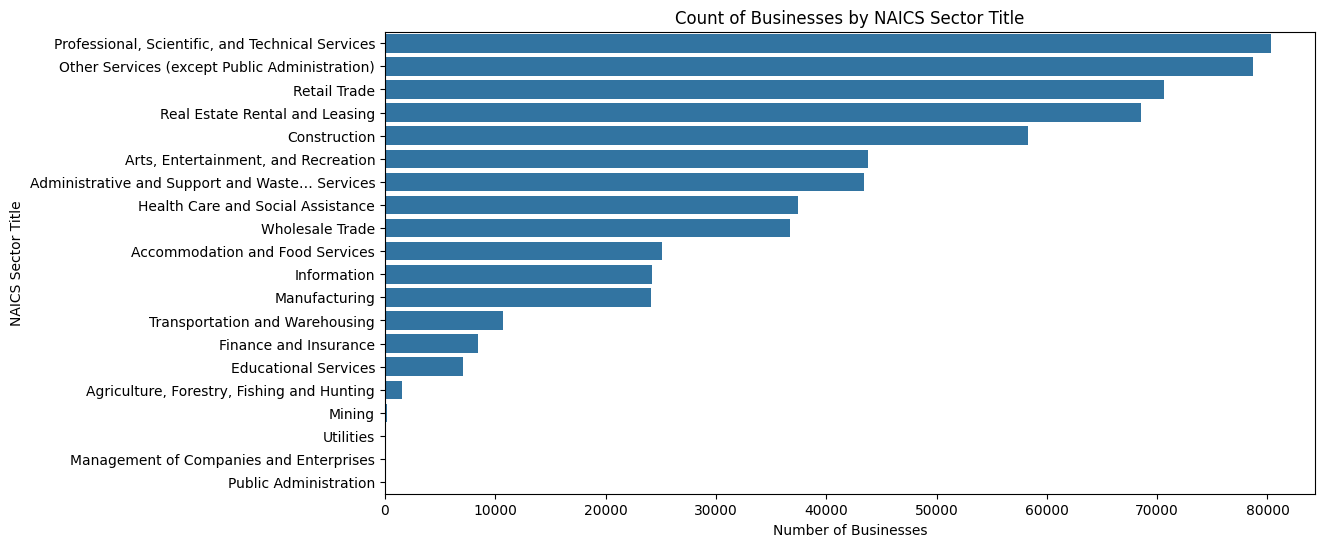

In [50]:
# count plot: the sectors are ordered by frequency
plot1 = plt.figure(figsize=(12, 6))
plot1 = sns.countplot(data=df1, y='2d_title', order=df1['2d_title'].value_counts().index)
plot1 = plt.title("Count of Businesses by NAICS Sector Title")
plot1 = plt.xlabel("Number of Businesses")
plot1 = plt.ylabel("NAICS Sector Title")
plot1

##### Distribution of Businesses by Council District

C:\Users\fredk\AppData\Local\Temp\ipykernel_12256\1954712996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot2 = sns.countplot(data=df1, x='COUNCIL DISTRICT', palette="viridis");


Text(0, 0.5, 'Number of Businesses')

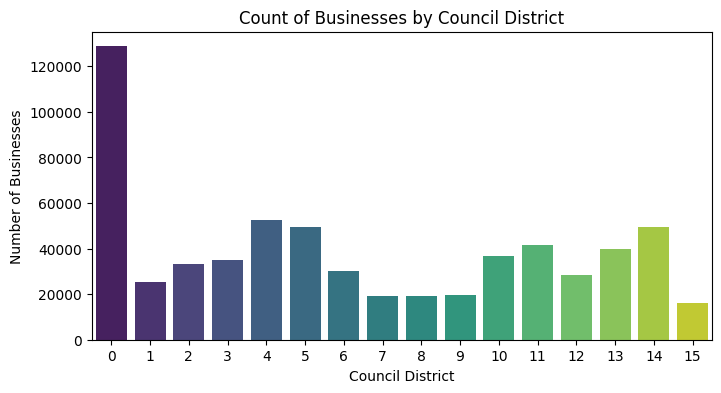

In [52]:
plot2 = plt.figure(figsize=(8, 4))
plot2 = sns.countplot(data=df1, x='COUNCIL DISTRICT', palette="viridis");
plot2 = plt.title("Count of Businesses by Council District")
plot2 = plt.xlabel("Council District")
plot2 = plt.ylabel("Number of Businesses")
plot2

##### closed business dataframe

In [56]:
df_closed = df1.dropna(subset=['LOCATION END DATE'])

In [58]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93433 entries, 28 to 1593016
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   LOCATION ACCOUNT #         93433 non-null  object        
 1   BUSINESS NAME              93433 non-null  object        
 2   DBA NAME                   28904 non-null  object        
 3   STREET ADDRESS             93432 non-null  object        
 4   CITY                       93427 non-null  object        
 5   ZIP CODE                   93433 non-null  object        
 6   LOCATION DESCRIPTION       93421 non-null  object        
 7   MAILING ADDRESS            22483 non-null  object        
 8   MAILING CITY               22483 non-null  object        
 9   MAILING ZIP CODE           22469 non-null  object        
 10  NAICS                      93433 non-null  Int64         
 11  PRIMARY NAICS DESCRIPTION  93433 non-null  object        
 12  COUNCI

#### To-Do:
Visualization:

Botplot: different induastry vs survivual time

Location: geo graph + (la zoning map or population density map)

survival time by different business (naics code) (similar to histogram)


Note: finalize presentation need to show simple EDA idaes
